Title: Regression Models

Ridge & Lasso Regression (Regularization Techniques)


Task 1: Use Ridge regression on a dataset with multicollinearity to compare results with linear regression.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with multicollinearity
np.random.seed(42)
X1 = np.random.rand(100, 1)
X2 = 0.8 * X1 + 0.2 * np.random.rand(100, 1)  # Highly correlated with X1
X = np.hstack((X1, X2))
y = 3 * X1.squeeze() + 2 * X2.squeeze() + np.random.randn(100) * 0.1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Results
print("Linear Regression Coefficients:", lr.coef_)
print("Ridge Regression Coefficients:", ridge.coef_)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))


Linear Regression Coefficients: [2.66013271 2.39358687]
Ridge Regression Coefficients: [2.5338319  2.08008659]
Linear Regression MSE: 0.00666432098865191
Ridge Regression MSE: 0.018045788915383405


Task 2: Implement Lasso regression and observe effect on feature selection in feature rich data.

Lasso Coefficients:
[ 2.81808168 -1.37193546  1.99216123 -0.          3.83080176  0.
 -0.          0.         -0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.        ]
Mean Squared Error: 0.30302872549255144


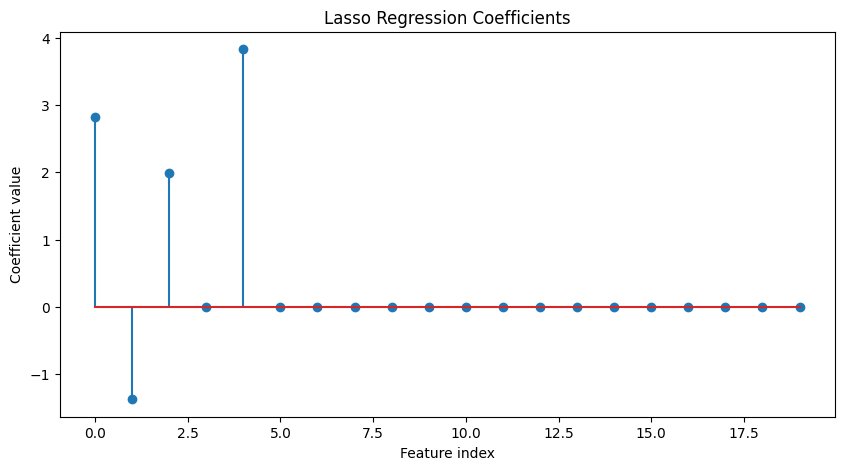

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic feature-rich data with some irrelevant features
np.random.seed(42)
n_samples, n_features = 100, 20
X = np.random.randn(n_samples, n_features)

# True coefficients - only first 5 features actually influence y
true_coefs = np.zeros(n_features)
true_coefs[:5] = [3, -1.5, 2, 0, 4]

y = X.dot(true_coefs) + np.random.randn(n_samples) * 0.5

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso regression with some regularization strength
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# Print coefficients to see which features are selected (non-zero coefficients)
print("Lasso Coefficients:")
print(lasso.coef_)

# Evaluate performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot coefficients to visualize feature selection effect


plt.figure(figsize=(10, 5))
plt.stem(range(n_features), lasso.coef_)
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Lasso Regression Coefficients')
plt.show()




Task 3: Regularization effects visualization with model complexity and performance metrics comparison.

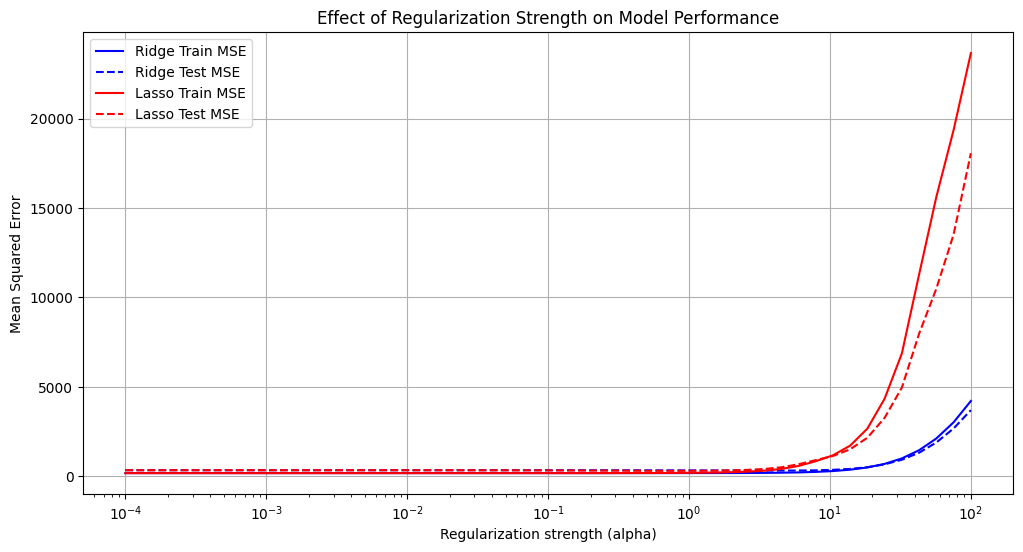

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate synthetic dataset with multicollinearity and noise
X, y = make_regression(n_samples=200, n_features=20, noise=15, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

alphas = np.logspace(-4, 2, 50)  # Range of regularization strengths
ridge_mse_train, ridge_mse_test = [], []
lasso_mse_train, lasso_mse_test = [], []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_mse_train.append(mean_squared_error(y_train, ridge.predict(X_train)))
    ridge_mse_test.append(mean_squared_error(y_test, ridge.predict(X_test)))
    
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_mse_train.append(mean_squared_error(y_train, lasso.predict(X_train)))
    lasso_mse_test.append(mean_squared_error(y_test, lasso.predict(X_test)))

# Plot MSE vs alpha for Ridge and Lasso
plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_mse_train, label='Ridge Train MSE', color='blue')
plt.plot(alphas, ridge_mse_test, label='Ridge Test MSE', color='blue', linestyle='--')
plt.plot(alphas, lasso_mse_train, label='Lasso Train MSE', color='red')
plt.plot(alphas, lasso_mse_test, label='Lasso Test MSE', color='red', linestyle='--')
plt.xscale('log')
plt.xlabel('Regularization strength (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Regularization Strength on Model Performance')
plt.legend()
plt.grid(True)
plt.show()
